# import package used and function defined #

In [52]:
import pandas as pd
import numpy  as np
import csv
import matplotlib.pyplot as plt

In [53]:
people = pd.read_csv("people.csv")
act_train = pd.read_csv("act_train.csv")
act_test  = pd.read_csv("act_test.csv")

In [54]:
#get act_test data activity id
act_test_id = act_test['activity_id']

In [55]:
#function to preprocess data set including dropped, process numeric and char type
def data_preprocess(data, dropped = None, changed_bool = None, changed_char = None, changed_n = None,date = True):
    
    if dropped:
        data = data.drop(dropped, axis = 1)
    if changed_bool:
        for item in changed_bool:
            data[item] =  pd.to_numeric(data[item]).astype(int)
    if changed_char:
        for item in changed_char:
            if 'group' in item:
                data[item] = data[item].fillna('gropu 0')
            else:
                data[item] = data[item].fillna('type 0')
            data[item] = [ i.split(' ')[1] for i in data[item]]
            data[item] = pd.to_numeric(data[item]).astype(int)
    if changed_n:
        for item in changed_n:
            data[item] = [i.split('_')[1] for i in data[item]]
            data[item] =pd.to_numeric(data[item]).astype(int)
    if date:
        data['date'] = pd.to_datetime(data['date'], coerce=True)
        data['year'] = data['date'].dt.year
        data['month'] = data['date'].dt.month
        data['day'] = data['date'].dt.day
        data['isweekend'] = (data['date'].dt.weekday >= 5).astype(int)
        data = data.drop('date', axis = 1)
    return data

In [56]:
#function to calculate the different types' percentage in features
def get_percent(data, col, outcome = None):
    type_cnts = {}
    type_percent = {}
    types = []
    types_per = []
    index = 0
    for item in data[col]:
        type_cnts.setdefault(item, 0)
        if type_cnts[item] == 0:
            types.append(item)
        if outcome != None and data[outcome][index] == 1:
            type_cnts[item] += 1
        elif outcome == None:
            type_cnts[item] += 1
        index = index + 1
    for item in type_cnts: 
        type_percent[item] = float(type_cnts[item])/float(len(data[col]))
        types_per.append(type_percent[item])
    return (types,types_per)

In [57]:
#function used after get_percent to get a pie graph to show the percentage of features'type
%matplotlib inline
def get_pie_chart(x, labels):
    
    plt.pie(x, labels = labels, autopct = '%1.1f%%')
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.show()

In [58]:
#function to get a directly view on relationship bewteen outcome and feature
plt.rc('figure', figsize=(10, 6))
def get_relation(item,data, kind='barh', subplots = True):
    counts = data[item].value_counts()
    res = np.where(data['outcome']== 1, 1, 0)
    by_char_res = data.groupby([item, res])
    agg_counts = by_char_res.size().unstack()
    agg_counts.plot(kind = kind, stacked = True, subplots=subplots)

# Analysis #

## Data Exploration ##

In [59]:
act_train.shape

(2197291, 15)

In [60]:
people.shape

(189118, 41)

In [61]:
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [62]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


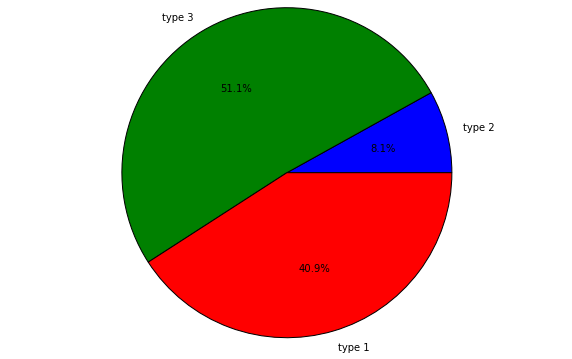

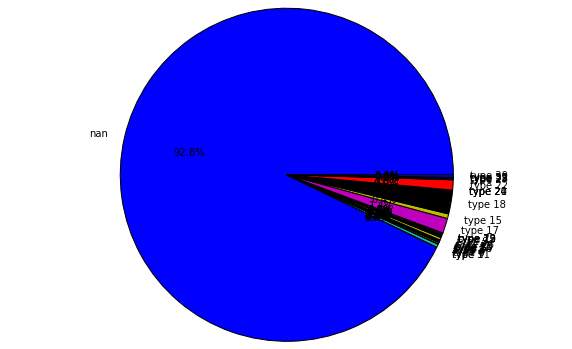

In [63]:
types_pl, pers_pl = get_percent(people, 'char_2')
types_act, per_act = get_percent(act_train, 'char_2')
get_pie_chart(pers_pl, types_pl)
get_pie_chart(per_act, types_act)

975497 1221794


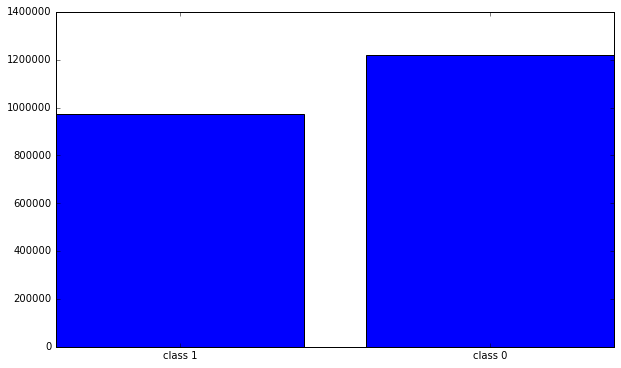

In [64]:
#to konw whether data set is banlanced
outcomes_1 = act_train[act_train['outcome'] > 0 ]
outcomes_0 = act_train[act_train['outcome'] == 0]
print(len(outcomes_1),len(outcomes_0))
plt.xticks((0,1),('class 1','class 0'))
plt.bar(left = (0,1), height = (len(outcomes_1), len(outcomes_0)), align = 'center')
plt.show()

## Exploratory Visualization ##
- This is to get some graph of relationship between feature and outcome 

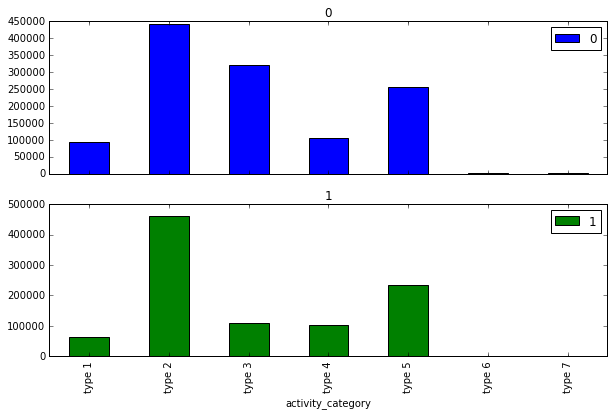

In [65]:
get_relation('activity_category',act_train, 'bar')

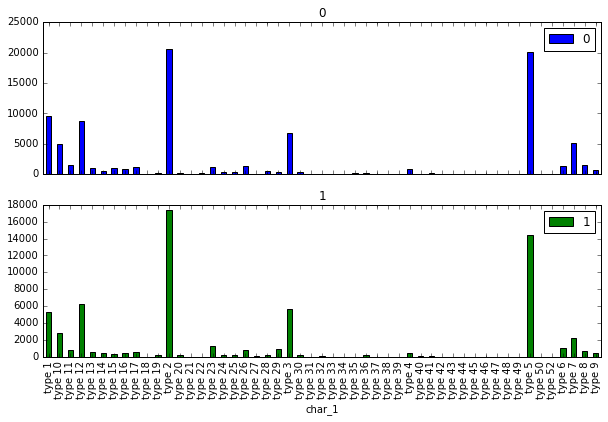

In [66]:
get_relation('char_1',act_train, 'bar')

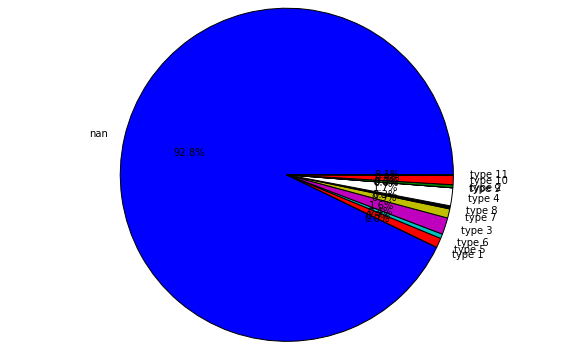

In [67]:
types_act, per_act = get_percent(act_train, 'char_3')
get_pie_chart(per_act, types_act)

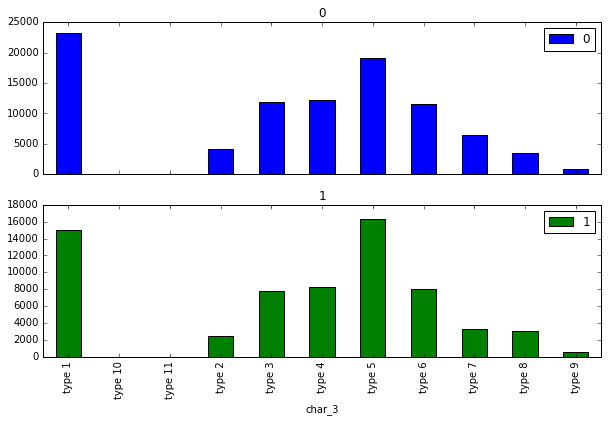

In [68]:
get_relation('char_3',act_train, 'bar')

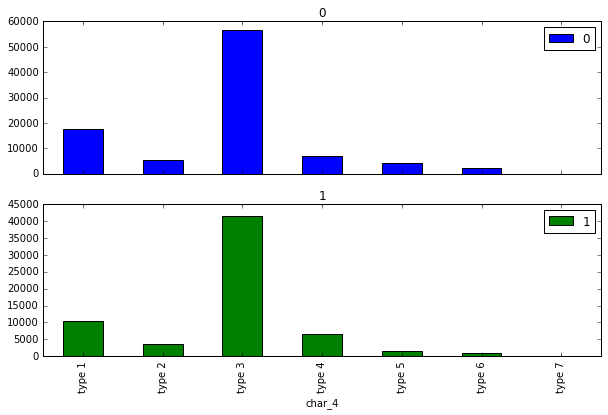

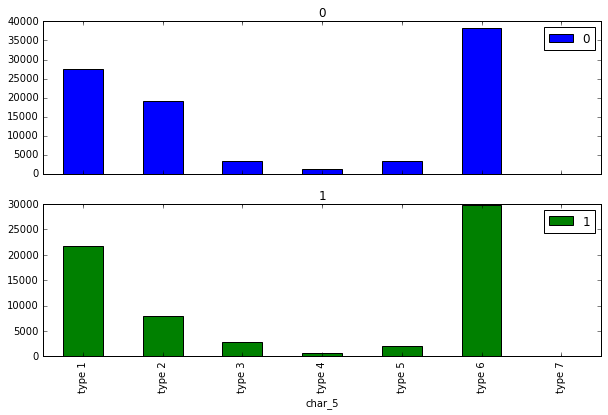

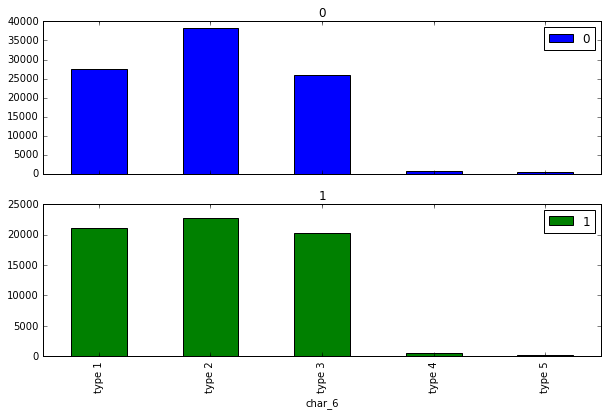

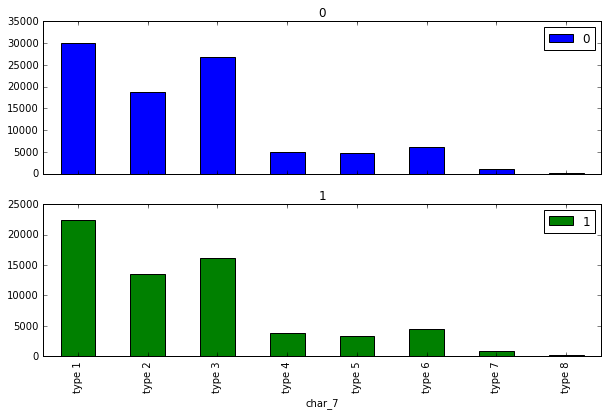

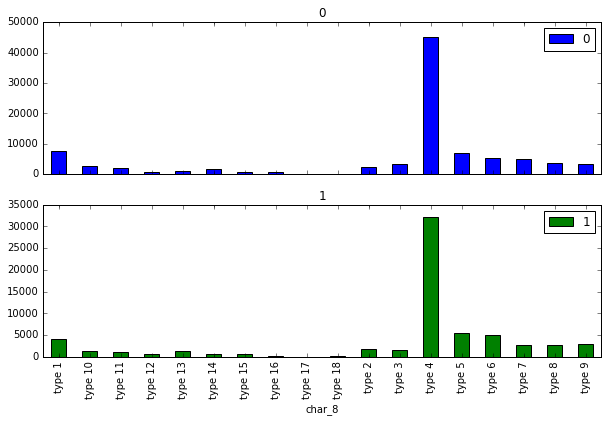

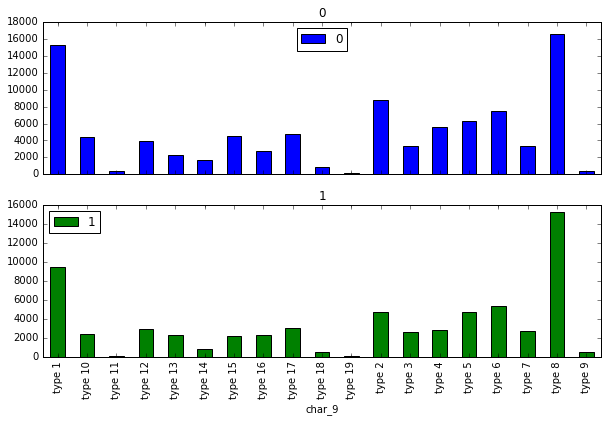

In [69]:
char_list = ['char_'+str(i) for i in range(4,10)]
for item in char_list:
    get_relation(item,act_train, 'bar')

In [70]:
#(data, dropped, changed_bool = None, changed_char = None, changed_n = None,)
dropped = ['char_'+ str(i) for i in range(1,11)]
act_train = data_preprocess(act_train, dropped, None,None,['people_id', 'activity_id'])

D:\Program Files (x86)\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [71]:
act_train.head()

,people_id,activity_id,activity_category,outcome,year,month,day,isweekend
0,100,1734928,type 4,0,2023,8,26,1
1,100,2434093,type 2,0,2022,9,27,0
2,100,3404049,type 2,0,2022,9,27,0
3,100,3651215,type 2,0,2023,8,4,0
4,100,4109017,type 2,0,2023,8,26,1


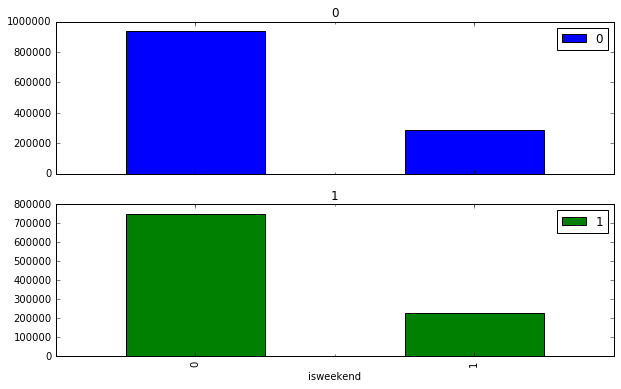

In [72]:
get_relation('isweekend',act_train, 'bar')

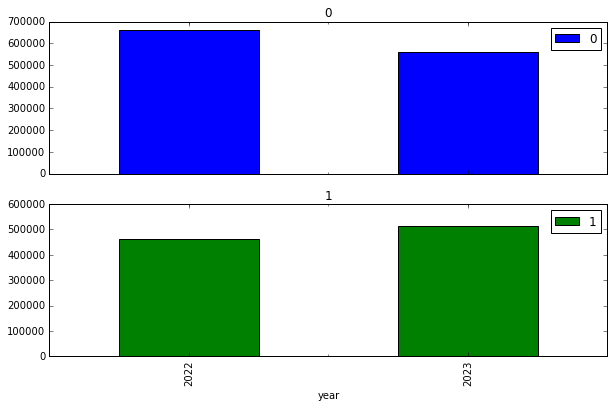

In [73]:
get_relation('year',act_train, 'bar')

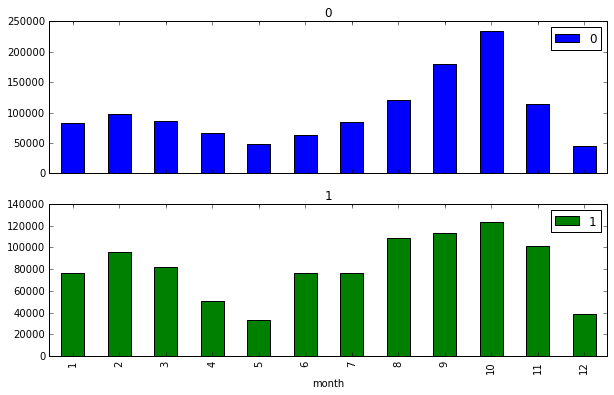

In [74]:
get_relation('month',act_train, 'bar')

In [75]:
dropped = ['year', 'month', 'day', 'isweekend','activity_category']
act_train = data_preprocess(act_train, dropped, None, None, None, False)

In [76]:
act_train.head()

,people_id,activity_id,outcome
0,100,1734928,0
1,100,2434093,0
2,100,3404049,0
3,100,3651215,0
4,100,4109017,0


In [77]:
people = data_preprocess(people, None, None, None,['people_id'], True)

D:\Program Files (x86)\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [78]:
people.head()

,people_id,char_1,group_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,...,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,isweekend
0,100,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,type 11,type 2,...,False,True,True,True,False,36,2021,6,29,0
1,100002,type 2,group 8688,type 3,type 28,type 9,type 5,type 3,type 11,type 2,...,True,True,True,True,False,76,2021,1,6,0
2,100003,type 2,group 33592,type 3,type 4,type 8,type 5,type 2,type 5,type 2,...,True,True,False,True,True,99,2022,6,10,0
3,100004,type 2,group 22593,type 3,type 40,type 25,type 9,type 4,type 16,type 2,...,True,True,True,True,True,76,2022,7,20,0
4,100006,type 2,group 6534,type 3,type 40,type 25,type 9,type 3,type 8,type 2,...,False,False,True,True,False,84,2022,7,27,0


In [79]:
act_train_people = pd.merge(act_train,people, how = 'left', on = 'people_id')

In [80]:
act_train_people.head()

,people_id,activity_id,outcome,char_1,group_1,char_2,char_3,char_4,char_5,char_6,...,char_33,char_34,char_35,char_36,char_37,char_38,year,month,day,isweekend
0,100,1734928,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,...,False,True,True,True,False,36,2021,6,29,0
1,100,2434093,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,...,False,True,True,True,False,36,2021,6,29,0
2,100,3404049,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,...,False,True,True,True,False,36,2021,6,29,0
3,100,3651215,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,...,False,True,True,True,False,36,2021,6,29,0
4,100,4109017,0,type 2,group 17304,type 2,type 5,type 5,type 5,type 3,...,False,True,True,True,False,36,2021,6,29,0


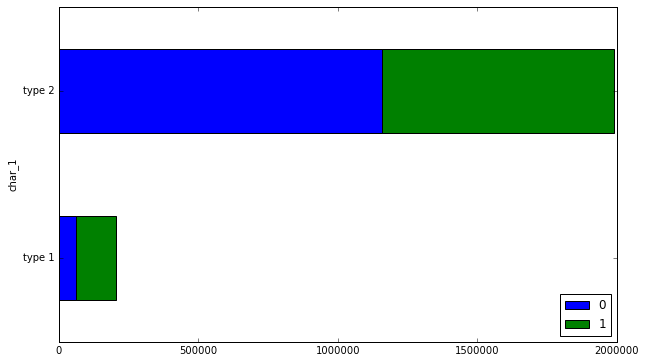

In [81]:
get_relation('char_1', act_train_people, 'barh', False)

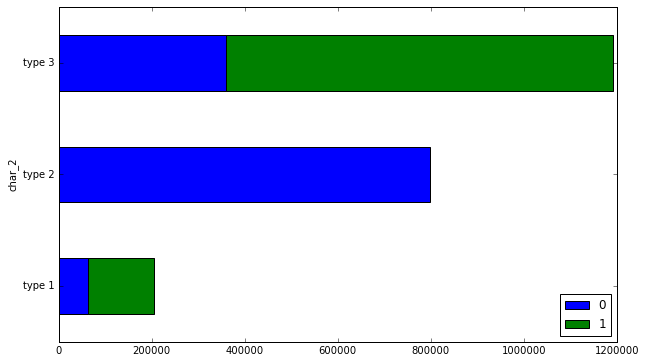

In [82]:
get_relation('char_2', act_train_people, 'barh', False)

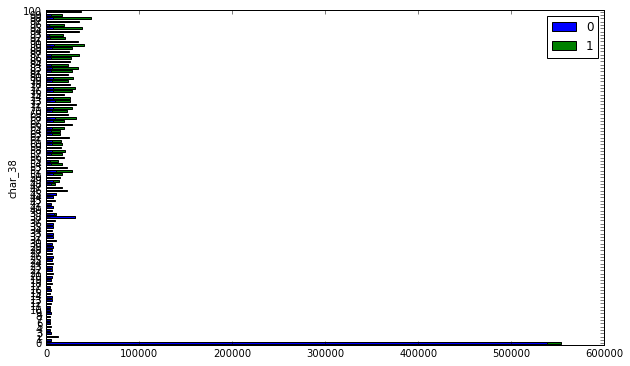

In [83]:
get_relation('char_38', act_train_people, 'barh', False)

D:\Program Files (x86)\WinPython-64bit-3.4.4.1\python-3.4.4.amd64\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


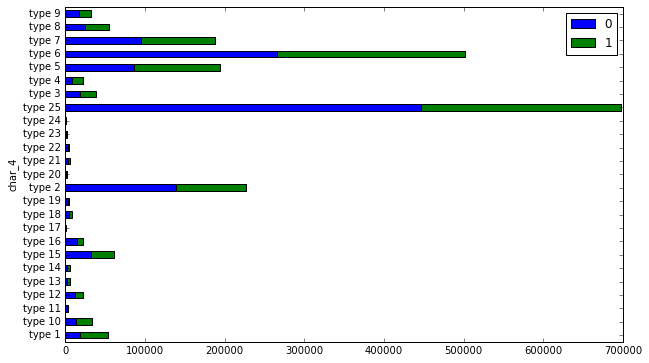

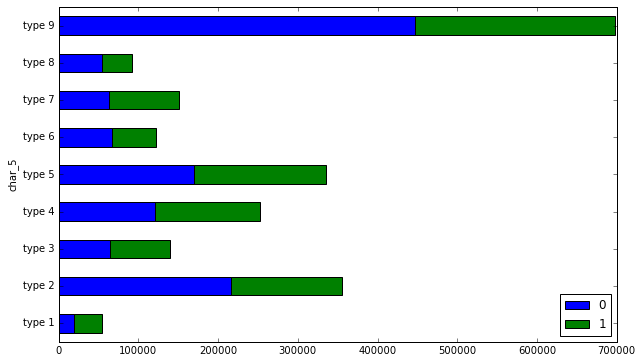

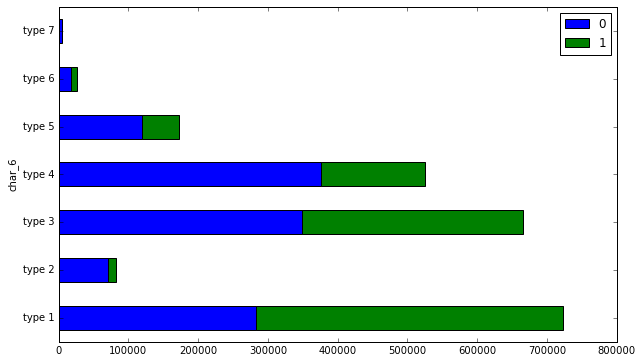

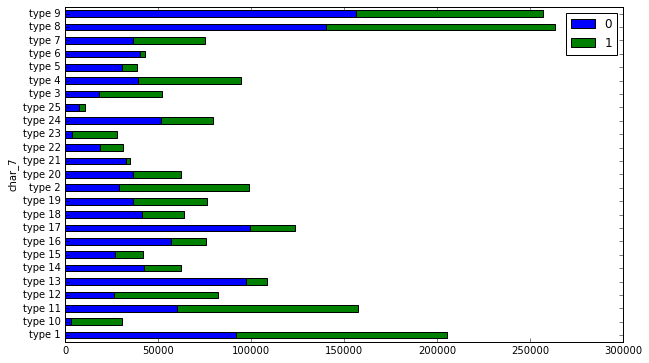

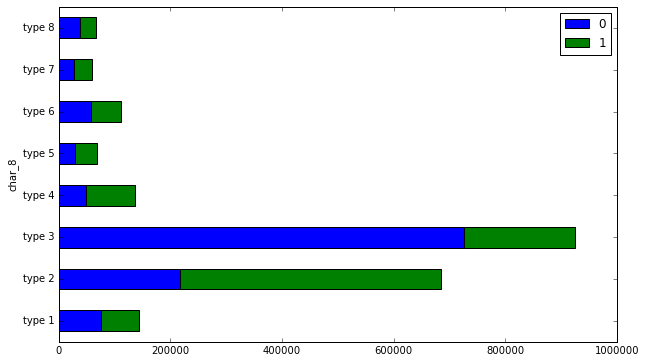

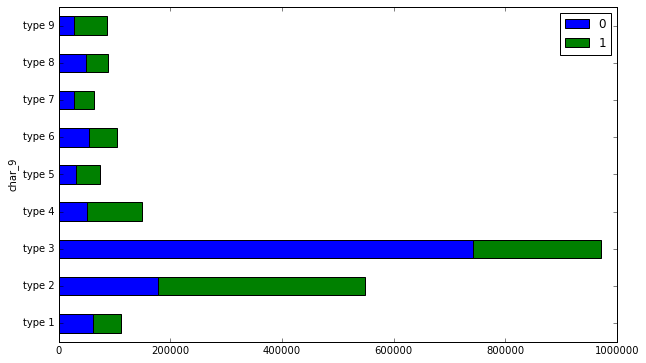

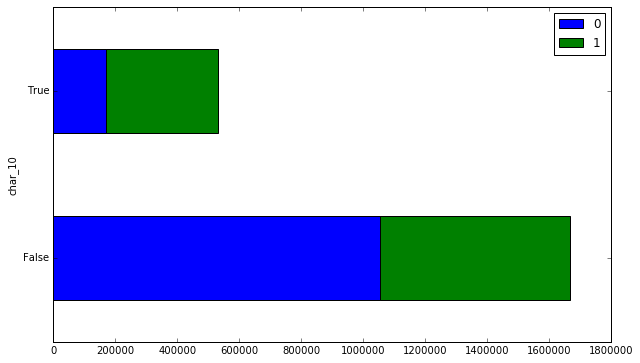

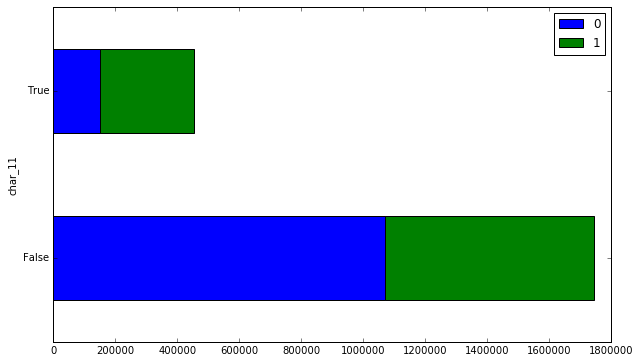

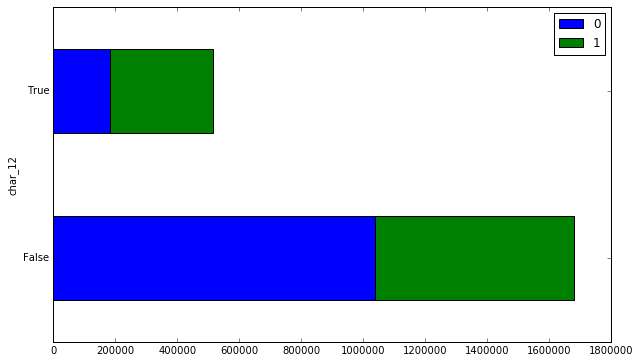

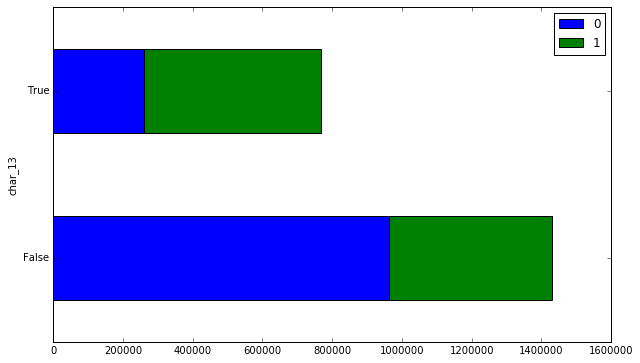

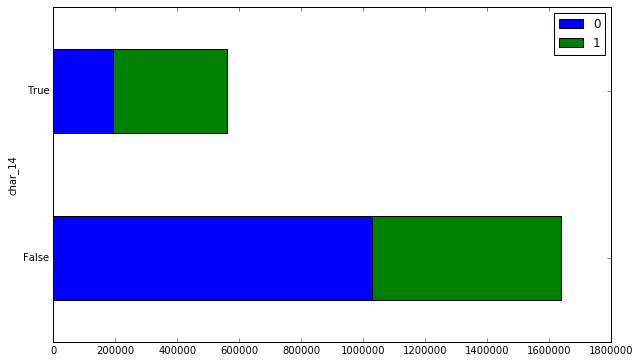

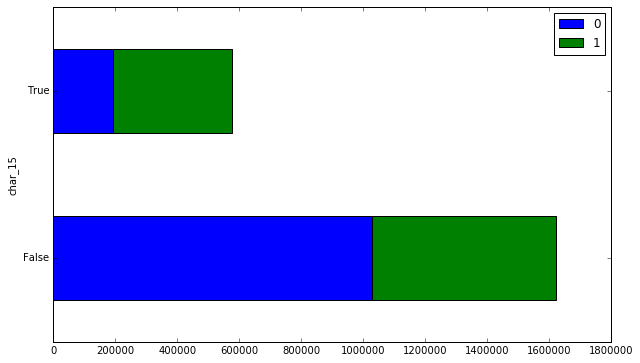

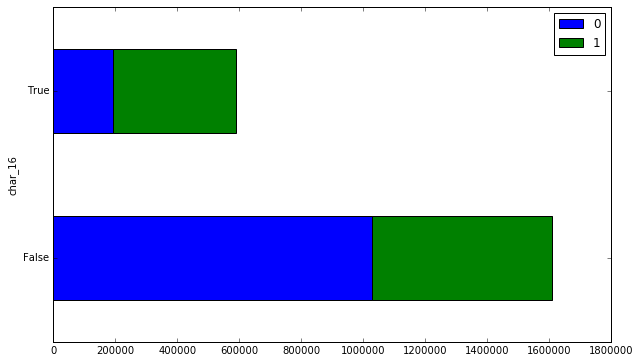

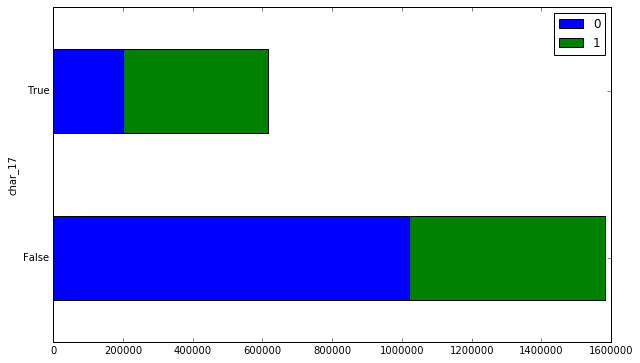

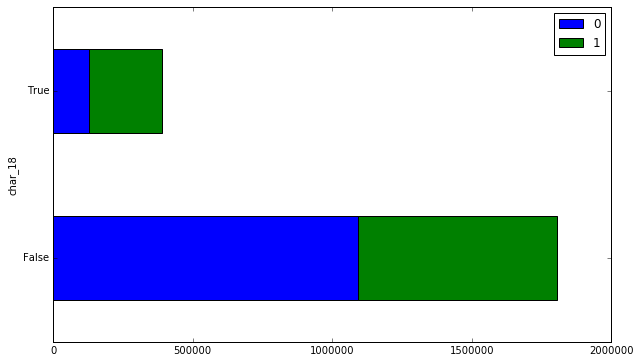

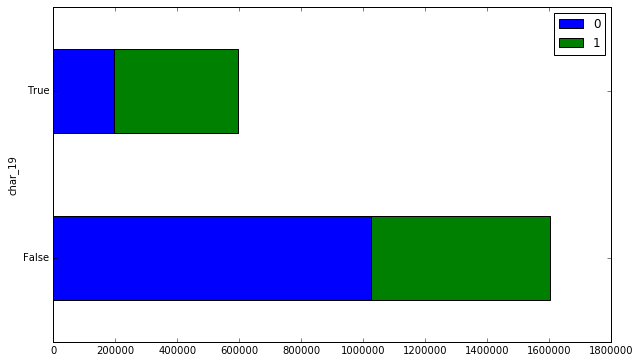

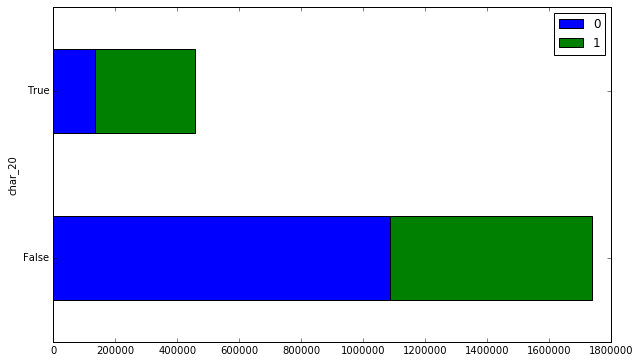

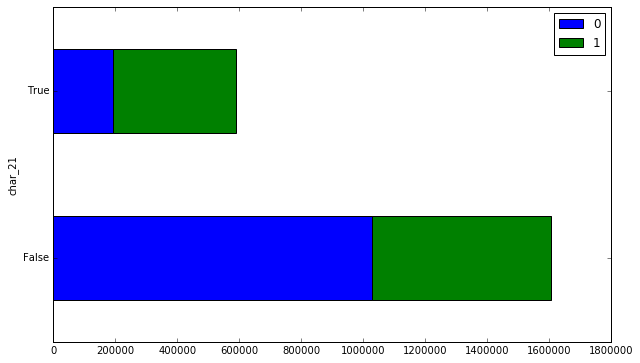

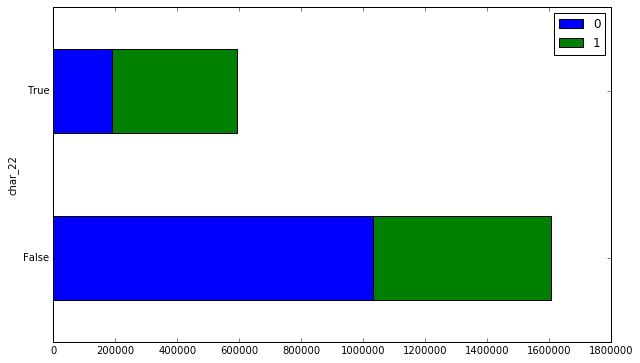

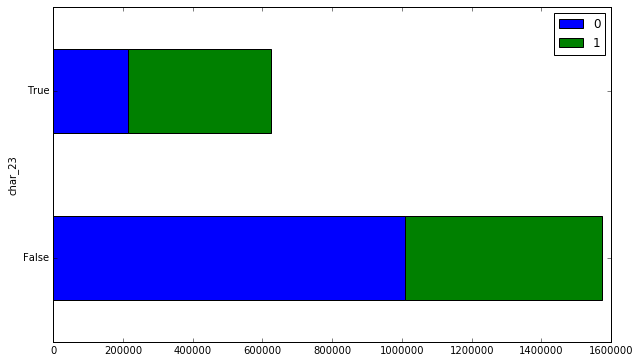

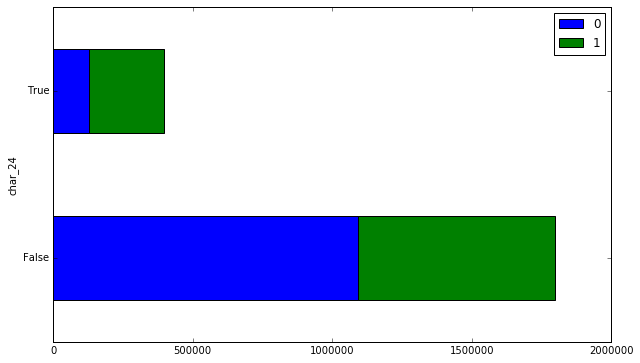

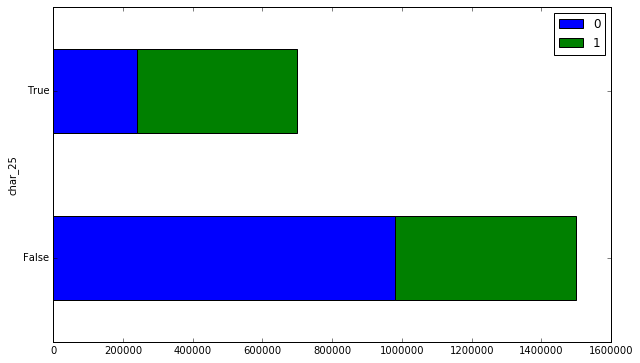

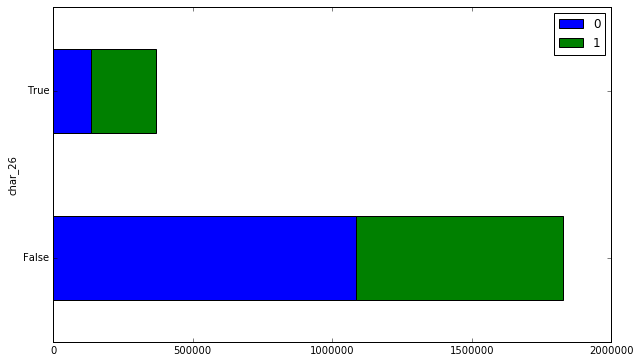

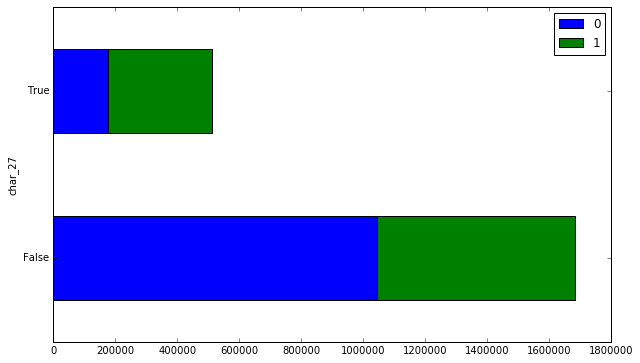

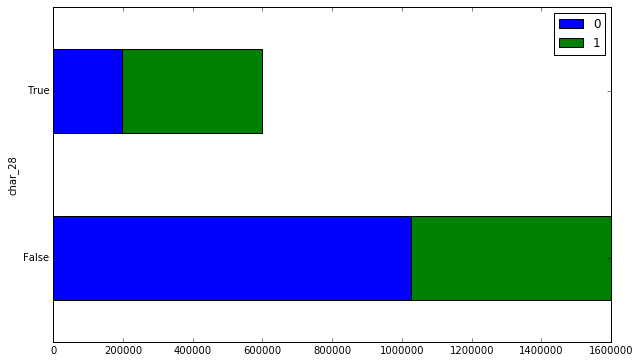

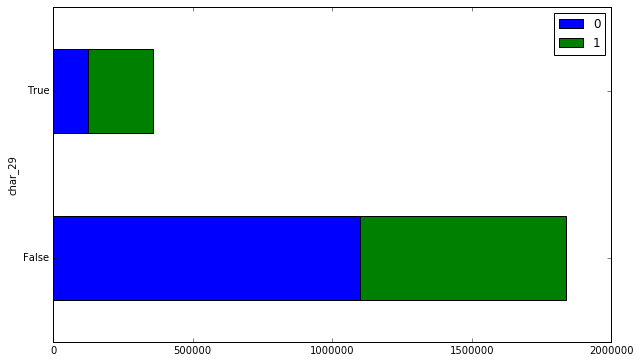

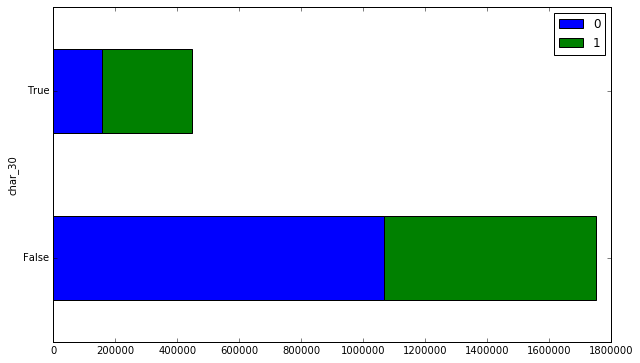

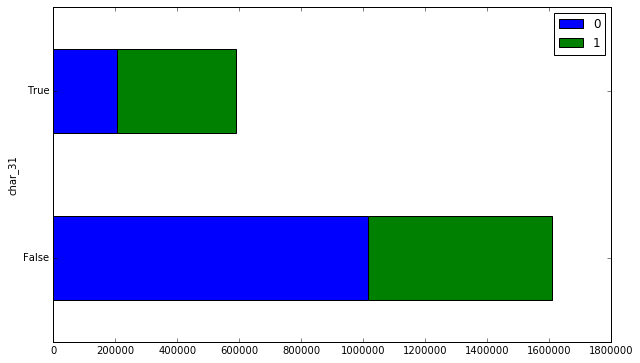

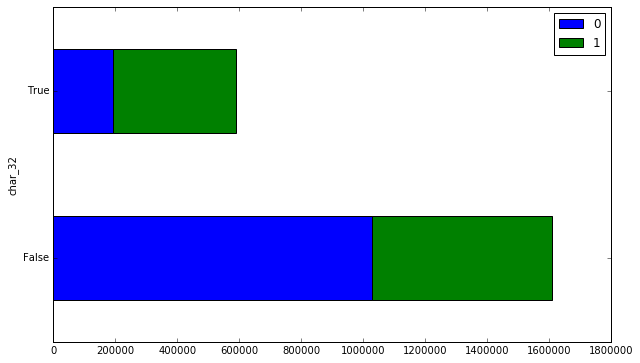

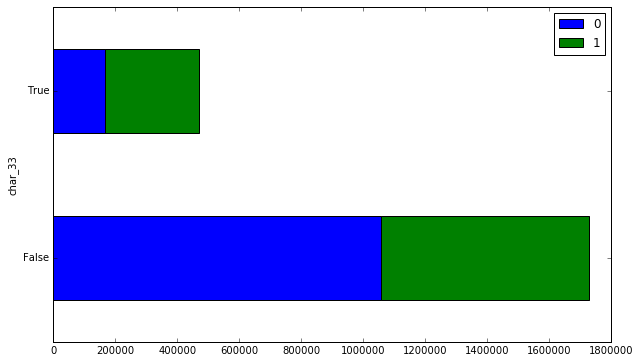

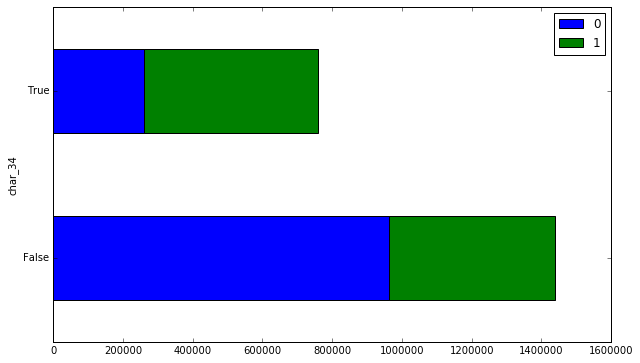

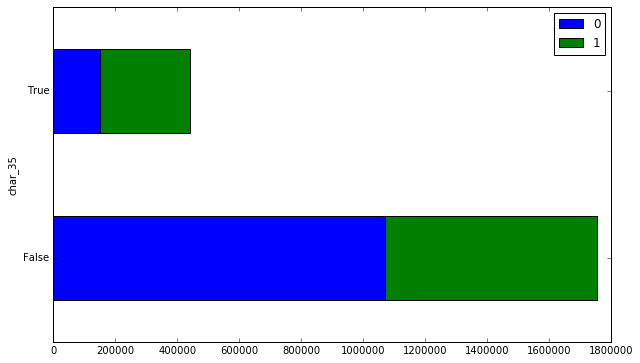

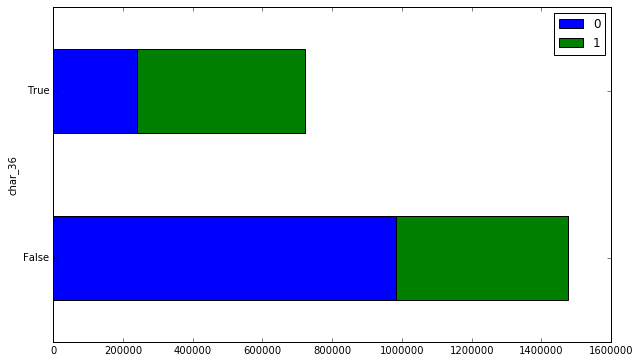

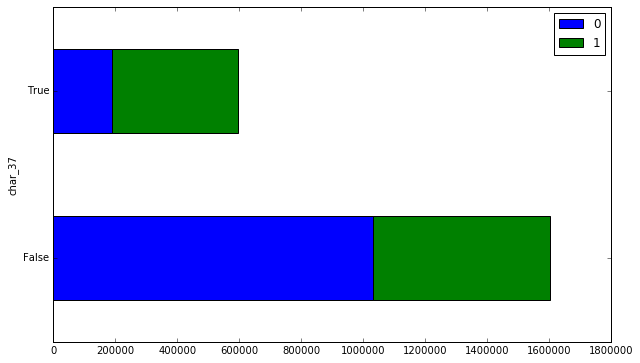

In [84]:
char_list = ['char_'+str(i) for i in range(4, 38)]
for item in char_list:
    get_relation(item, act_train_people, 'barh', False)

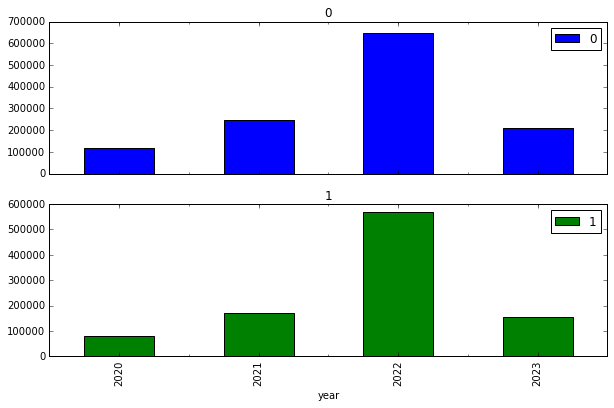

In [85]:
get_relation('year', act_train_people, 'bar', True)

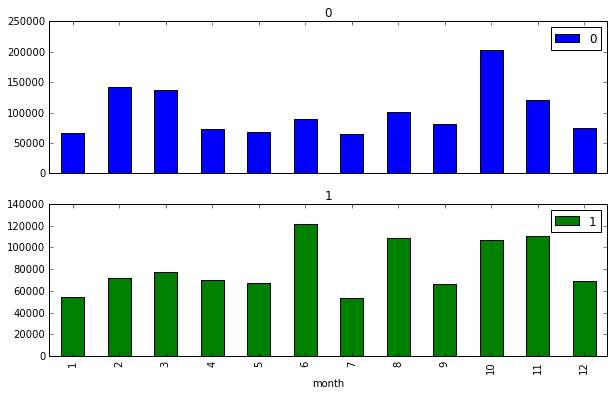

In [86]:
get_relation('month', act_train_people, 'bar', True)

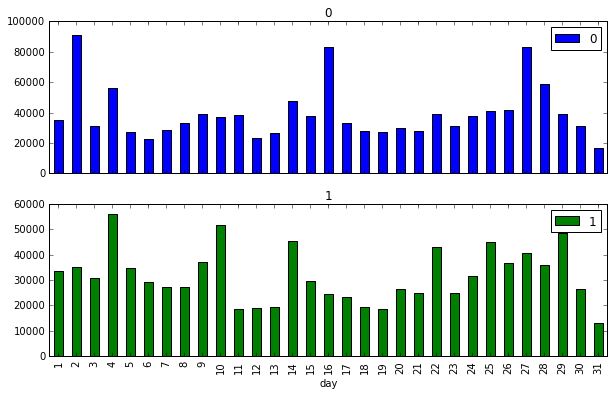

In [87]:
get_relation('day', act_train_people, 'bar', True)

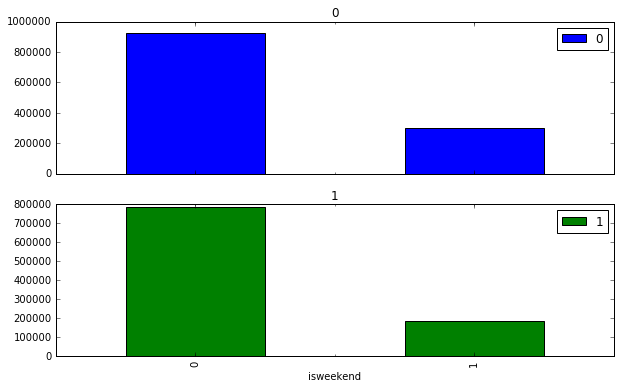

In [88]:
get_relation('isweekend', act_train_people, 'bar', True)

In [90]:
 #data_preprocess(data, dropped = None, changed_bool = None, changed_char = None, changed_n = None,date = True)
char_list.append('char_3')
char_list.append('char_1')
char_list.append('month')
char_list.append('year')
char_list.append('day')
char_list.append('isweekend')
act_train_people = data_preprocess(act_train_people, char_list,None, ['group_1', 'char_2'], None, False)

In [91]:
act_train_people.head()

,people_id,activity_id,outcome,group_1,char_2,char_38
0,100,1734928,0,17304,2,36
1,100,2434093,0,17304,2,36
2,100,3404049,0,17304,2,36
3,100,3651215,0,17304,2,36
4,100,4109017,0,17304,2,36


In [92]:
dropped = ['char_'+ str(i) for i in range(3,38)]
dropped.append('char_1')
dropped.append('year')
dropped.append('month')
dropped.append('day')
dropped.append('isweekend')
people = data_preprocess(people, dropped,None,['group_1', 'char_2'],None, False)
people.head()

,people_id,group_1,char_2,char_38
0,100,17304,2,36
1,100002,8688,3,76
2,100003,33592,3,99
3,100004,22593,3,76
4,100006,6534,3,84


In [93]:
# data_preprocess(data, dropped = None, changed_bool = None, changed_char = None, changed_n = None,date = True)
dropped = ['char_'+str(i) for i in range(1,11)]
dropped.append('date')
dropped.append('activity_category')
act_test = data_preprocess(act_test, dropped, None, None, ['people_id', 'activity_id'], False)

In [94]:
act_test.head()

,people_id,activity_id
0,100004,249281
1,100004,230855
2,10001,240724
3,10001,83552
4,10001,1043301


In [95]:
act_test_people = pd.merge(act_test,people, how = 'left', on = 'people_id')
act_test_people.head()

,people_id,activity_id,group_1,char_2,char_38
0,100004,249281,22593,3,76
1,100004,230855,22593,3,76
2,10001,240724,25417,3,90
3,10001,83552,25417,3,90
4,10001,1043301,25417,3,90


In [106]:
#function to normalization
def Normalization(data1, data2, columnName, useLOO=False):
    grpOutcomes = data1.groupby(columnName).mean().reset_index()
    outcomes = data2['outcome'].values
    x = pd.merge(data2[[columnName, 'outcome']], grpOutcomes,
                 how='left',
                 suffixes=('x_', ''),
                 on=columnName,
                 left_index=True)['outcome']
    if(useLOO):
        x = ((x*x.shape[0])-outcomes)/(x.shape[0]-1)
    return x.fillna(x.mean())

In [107]:
train_set = pd.DataFrame()
for col in act_train_people.columns:
    if(col != 'outcome' and col != 'people_id'):
        print(col)
        train_set[col] = Normalization(act_train_people, act_train_people, col, False).values

activity_id
group_1
char_2
char_38


In [108]:
#Train Model
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold
import time

In [109]:
labels = act_train_people['outcome']

In [111]:
k_fold = KFold(len(labels), 10,)
labels.reset_index(drop=True, inplace=True)

In [112]:
start_time = time.time()
dt = DecisionTreeClassifier(max_features= 'log2', max_depth = 3)
for k, (train_index, test_index) in enumerate(k_fold):
    dt.fit(train_set.iloc[train_index], labels[train_index])
    preds = dt.predict_proba(train_set.iloc[test_index])[0:,1]
    print('roc', roc_auc_score(labels[test_index], preds))
end_time = time.time()
print("The train costing time is %s"%(str(end_time - start_time)))

roc 0.997356703233
roc 0.998994780197
roc 0.999061507657
roc 0.999455907122
roc 0.999949734415
roc 0.999891517812
roc 0.984893394789
roc 0.999433217907
roc 0.999960637003
roc 0.999389971321
The costing time is 22.41643500328064


In [114]:
act_test_people['outcome'] = 0
test_set = pd.DataFrame()
for col in act_train_people.columns:
    if(col != 'outcome' and col != 'people_id'):
        print(col)
        test_set[col] = Normalization(act_train_people, act_test_people, col, False).values

activity_id
group_1
char_2
char_38


In [116]:
start_time = time.time()
preds = dt.predict_proba(test_set)[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': preds})
RedHat.to_csv("RedHat_DT_1203.csv", index = False)
end_time = time.time()
print("The test costing time is %s"%(str(end_time - start_time)))

The test costing time is 3.0796988010406494


In [117]:
start_time = time.time()
rf = RandomForestClassifier(max_features= 'log2', max_depth = 3)
for k, (train_index, test_index) in enumerate(k_fold):
    rf.fit(train_set.iloc[train_index], labels[train_index])
    preds = dt.predict_proba(train_set.iloc[test_index])[0:,1]
    print('roc', roc_auc_score(labels[test_index], preds))
end_time = time.time()
print("The train costing time is %s"%(str(end_time - start_time)))

roc 0.999471319584
roc 0.999262046822
roc 0.99941934032
roc 0.999431845121
roc 0.999372170489
roc 0.999550060664
roc 0.999308114647
roc 0.999466475353
roc 0.999391087834
roc 0.999389971321
The train costing time is 104.02619099617004


In [118]:
start_time = time.time()
preds = rf.predict_proba(test_set)[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': preds})
RedHat.to_csv("RedHat_RF_1203.csv", index = False)
end_time = time.time()
print("The test costing time is %s"%(str(end_time - start_time)))

The test costing time is 3.729306936264038


In [123]:
from sklearn.grid_search import GridSearchCV
para = {'max_features':[ 'log2', 'sqrt'], 'max_depth':[3,4,5], 'criterion':['entropy', 'gini']}

In [124]:
start_time = time.time()
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, para, cv = k_fold,)
clf.fit(train_set.values, labels)
clf = clf.best_estimator_
end_time = time.time()
print("The train costing time is %s"%(str(end_time - start_time)))

The train costing time is 255.69237804412842


In [125]:
start_time = time.time()
preds = clf.predict_proba(test_set)[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': preds})
RedHat.to_csv("RedHat_GRIDDT_1203.csv", index = False)
end_time = time.time()
print("The test costing time is %s"%(str(end_time - start_time)))

The test costing time is 3.047544002532959


In [126]:
start_time = time.time()
dt = RandomForestClassifier()
clf = GridSearchCV(dt, para, cv = k_fold,)
clf.fit(train_set.values, labels)
clf = clf.best_estimator_
end_time = time.time()
print("The train costing time is %s"%(str(end_time - start_time)))

The train costing time is 1237.7881319522858


In [128]:
start_time = time.time()
preds = clf.predict_proba(test_set)[:,1]
RedHat = pd.DataFrame({'activity_id': act_test_id, 'outcome': preds})
RedHat.to_csv("RedHat_GRIDRF_1203.csv", index = False)
end_time = time.time()
print("The test costing time is %s"%(str(end_time - start_time)))

The test costing time is 3.2769320011138916
